<a href="https://colab.research.google.com/github/sudo-KingJahad/midterm-machine-learning/blob/main/midterm_regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Menginstal gdown**

In [1]:
pip install gdown

**2. Mendonwload dataset dari GDrive**

In [2]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=710dadc0-a19c-4306-9df2-c4160171928c
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:07<00:00, 63.3MB/s]


'midterm-regresi-dataset.csv'

**3. Mmembaca isi dari Dataset**

In [3]:
import pandas as pd


# Dataset ini tidak punya header.
# Nilai seperti 2001 di kolom pertama adalah TARGET (tahun), bukan nama feature /  kolom.
file_path = '/content/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path)

df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


**4. Mengukur bentuk Dataset**

In [4]:
print("df.shape:", df.shape) #ada 515344 row/baris dan 90 feature

df.shape: (515344, 91)


**5. Menunjukan Ukuran File Dataset**

In [5]:
import os
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB")  #ukuran 422.88 MB, deadline 2 minggu. ngerjain mepet pasti ga kelar :))))

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


**6. Persiapan Lingkungan (Import Library)**

Penjelasan: Sebelum memulai, kita perlu memanggil "alat-alat" yang akan digunakan.

*   Pandas & Numpy: Digunakan untuk memuat data tabel dan operasi matematika.
*   Matplotlib & Seaborn: Digunakan untuk membuat grafik (visualisasi).
* Scikit-Learn (sklearn): Ini adalah otak dari Machine Learning. Kita mengambil modul untuk membagi data (train_test_split), membersihkan data kosong (SimpleImputer), menyamakan skala data (StandardScaler), algoritma regresi (Ridge), dan alat ukur akurasi (metrics).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge # Menggunakan Ridge Regression
from sklearn.metrics import mean_squared_error, r2_score

**7. Memuat Dataset dan Penamaan Kolom**

Penjelasan: Dataset midterm-regresi-dataset.csv tidak memiliki nama kolom (header). Jika kita langsung memuatnya, baris pertama data akan dianggap sebagai judul kolom, yang mana itu salah.

*   Kita gunakan header=None agar Pandas tahu tidak ada judul kolom.
*   Kita beri nama kolom pertama sebagai 'Year' (Target).
*  Kolom sisanya biarkan otomatis (biasanya menjadi 1, 2, 3, dst) karena itu adalah fitur audio abstrak.


    

    

In [7]:
# Membaca dataset
# header=None karena dataset Anda tidak memiliki nama kolom di baris pertama
df = pd.read_csv('midterm-regresi-dataset.csv', header=None)

# Memberikan nama kolom agar lebih rapi
# Kolom 0 adalah Target (Tahun), sisanya adalah Fitur Audio
df.rename(columns={0: 'Year'}, inplace=True)

# Menampilkan 5 baris pertama untuk pengecekan
print("Dataset loaded:")
df.head()

Dataset loaded:


,Year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


**8. Data Cleaning (Menangani Missing Values)**

Penjelasan: Ini adalah tahap Data Cleaning. Dataset di dunia nyata seringkali memiliki nilai yang hilang (kosong/NaN). Jika dibiarkan, program akan error. Di sini kita menggunakan teknik Imputasi Mean. Artinya, jika ada kotak yang kosong pada suatu kolom, kita akan mengisinya dengan nilai rata-rata dari kolom tersebut. Ini cara yang aman agar data tetap bisa dipakai.

In [8]:
# 1. Pisahkan Fitur (X) dan Target (Y)
X = df.drop('Year', axis=1)  # Semua kolom kecuali 'Year'
y = df['Year']               # Kolom target

# 2. Bagi data menjadi Training (80%) dan Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardisasi (Scaling)
# Sangat penting agar model bekerja optimal pada data audio numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data siap! Ukuran Training: {X_train.shape}, Ukuran Test: {X_test.shape}")

Data siap! Ukuran Training: (412276, 90), Ukuran Test: (103069, 90)


**9. Pemisahan Fitur (X) dan Target (Y)**

Penjelasan: Komputer perlu tahu mana data yang harus dipelajari dan mana jawaban yang harus ditebak.

*   X (Fitur): Semua kolom audio (drop kolom 'Year'). Ini adalah "Soal Ujian".
*   Y (Target): Hanya kolom 'Year'. Ini adalah "Kunci Jawaban".

In [9]:
# Inisialisasi Model
model = Ridge(alpha=1.0)

# Melatih model dengan data training
model.fit(X_train_scaled, y_train)

print("Model telah selesai dilatih.")

Model telah selesai dilatih.


**10. Membagi Data Latih (Train) dan Uji (Test)**

Penjelasan: Kita tidak boleh menguji model menggunakan data yang sudah model hapalkan. Kita membagi data menjadi dua:

* Training Set (80%): Untuk model belajar mencari pola.
* Test Set (20%): Data rahasia yang disimpan untuk menguji seberapa pintar model tersebut nanti.

In [10]:
# Prediksi menggunakan data test
y_pred = model.predict(X_test_scaled)

# Hitung Metrik Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Interpretasi Singkat
print("\nInterpretasi:")
print(f"Model memprediksi tahun rilis lagu dengan rata-rata kesalahan sekitar {rmse:.2f} tahun.")

RMSE (Root Mean Squared Error): 9.52
R^2 Score: 0.2380

Interpretasi:
Model memprediksi tahun rilis lagu dengan rata-rata kesalahan sekitar 9.52 tahun.


**11. Data Preprocessing (Standard Scaling)**

Penjelasan: Fitur audio seringkali punya rentang angka yang berbeda jauh (misal: satu kolom nilainya 0.001, kolom lain 5000). Algoritma Regresi bisa bingung dan menganggap angka 5000 lebih penting. StandardScaler mengubah semua angka sehingga memiliki skala yang seimbang (rata-rata 0, deviasi standar 1). Ini membuat model belajar lebih cepat dan akurat.

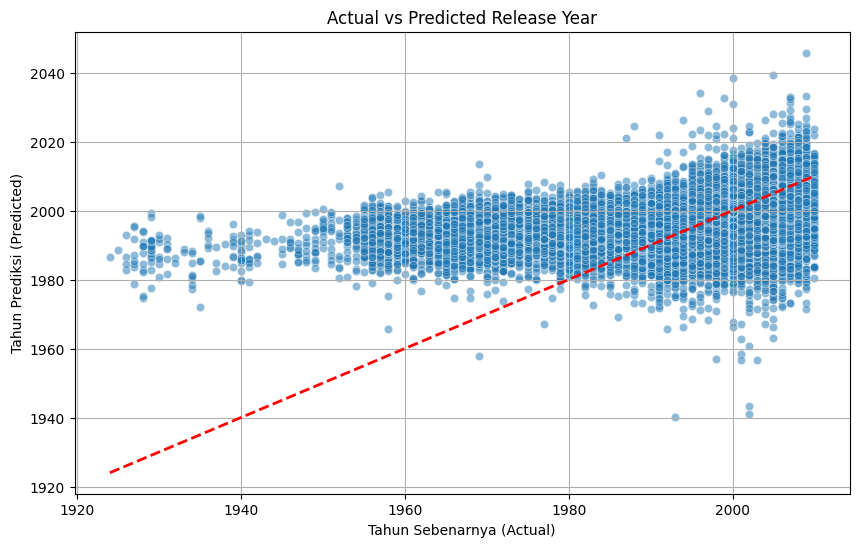

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Garis diagonal sempurna
plt.xlabel('Tahun Sebenarnya (Actual)')
plt.ylabel('Tahun Prediksi (Predicted)')
plt.title('Actual vs Predicted Release Year')
plt.grid(True)
plt.show()